# Tutorial on the Python bindings for ImageMath module 

This module provides element-wise arithmetic operations for `SharedImage` and `SharedImageSet`.

You can apply the `imagemath` functionalities directly with `SharedImage` instances, `SharedImageSet` instances, and scalar values.
The functions of the `imagemath` module are defined in a consistent way with the functions of `numpy`, which makes it easy to apply your existing knowledge of `numpy` to work with ImFusion image types.

For evaluation, default approach is the eager evaluation as it is defined in `numpy`. **Eager evaluation** means that operations are executed immediately when they are called. 
This approach is ideal for small-scale image processing tasks where performance is not a concern and immediate results are desired.

### Lazy Evaluation
Alternatively, the module supports **lazy evaluation** through the `imagemath.lazy` submodule. **Lazy evaluation** postpones the execution of operations until the result is actually needed, which allows for more efficient memory usage and computational management. This is particularly advantageous when working with large datasets, as intermediate results are not stored in memory. Instead, an expression tree is built up by chaining multiple operations and operands, and then the full computation is only performed when you explicitly request the final result.

### Expression Wrappers
If you want to utilize the lazy evaluation approach, you need to create the expressions for `SharedImage`, `SharedImageSet`, and scalar values using the `Expression` wrapper class provided by the `imagemath.lazy` submodule. `Expression` class enables the construction of an expression tree. Lastly, you need to call `evaluate()` method with your final expression.   

In [2]:
from imfusion import SharedImage, SharedImageSet
from imfusion import imagemath as im
from imfusion._bindings.imagemath import lazy  # TODO: get rid of _bindings 
from imfusion._bindings.imagemath.lazy import Expression  # TODO: get rid of _bindings 

from matplotlib import pyplot as plt
import numpy as np

from demo_utils import display_images

In [3]:
# create two simple SharedImage instances
(width, height, channel) = (10, 10, 1)
img1 = np.zeros([width, height, channel], dtype='float32')  
img1[4:6, 4:6, :] = 2
si1 = SharedImage(img1)

img2 = np.zeros([width, height, channel], dtype='float32')
img2[2:5, 2:5, :] = 3
si2 = SharedImage(img2)

### Mathematical functions

**Binary arithmetic operations**

As an example, let us add two `SharedImage` instances, `si1` and `si2`. 

For binary arithmetic operations, you can use the module methods from the `imagemath` module or the dunder methods of `SharedImage` or `SharedImageSet`, e.g. `SharedImage.__add__()`.

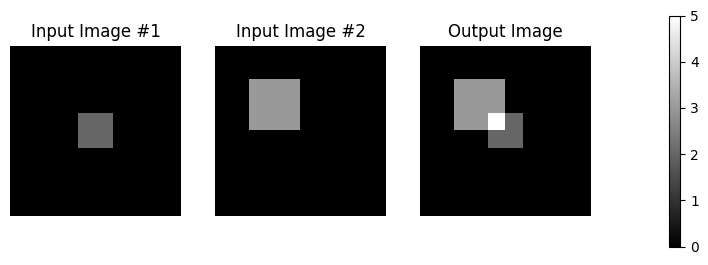

In [4]:
# use the add method from the imagemath module
res = im.add(si1, si2) 

# or use + operator to add two SharedImage instances
# the result is a new SharedImage instance
res = si1 + si2

display_images(si1, si2, res)

Here are some other binary arithmetic operations from the imagemath module.
See our documentation for more details. 

In [5]:
res = im.subtract(x1=si1, x2=si2)
res = im.multiply(x1=si1, x2=si2)
res = im.divide(x1=si1, x2=si2)

**Unary arithmetic operations**

As an example, let us take the absolute value of a `SharedImage` instance, `si1`.

You can use the module method from the `imagemath` module similar to the binary operation example. 
Alternatively, you can use the dunder method of `SharedImage` or `SharedImageSet`, e.g. `SharedImage.__abs__()`.

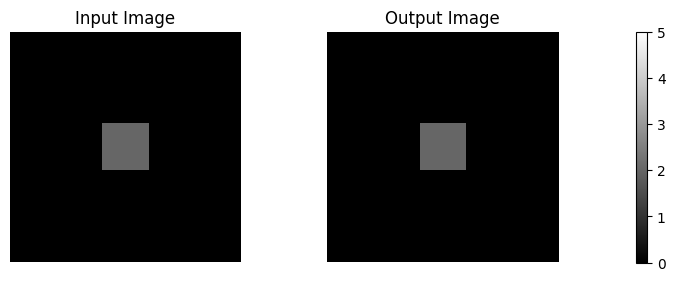

In [6]:
# use the module method from imagemath 
si = im.absolute(si1)  

# or use abs() operator
res = abs(si) 

display_images(si, res)

**Extrema finding**

Find the element-wise maximum of `SharedImage` instances, `si1` and `si2`.

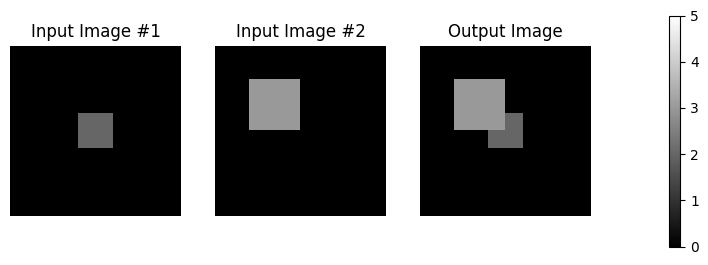

In [7]:
res = im.maximum(si1, si2)  # module method from imagemath

display_images(si1, si2, res)

Find the channel-wise maximum element of a `SharedImage` instance. 

In [8]:
res = im.max(si1)  # module method from imagemath 
res = si1.max()    # class method of SharedImage

print("Maximum value of the image (channel-wise):", res)

Maximum value of the image (channel-wise): [2.]


**Sums, products, differences**

Find the channel-wise mean of `SharedImage` instance. Result will be a numpy array. `si1` was a single channel image, so the result will be an array with a single value. 

In [9]:
res = im.mean(si1)  # module method from imagemath 
res = si1.mean()    # class method of SharedImage

print("Mean value of the image (channel-wise):", res)
print(type(res))

Mean value of the image (channel-wise): [0.08]
<class 'numpy.ndarray'>


**Exponents and logarithms**

Find the element-wise exponentials of a `SharedImage` instance.

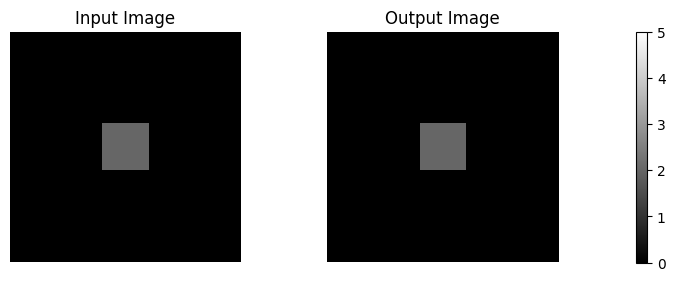

In [10]:
si1_exp = im.exp(si1)
res = im.log(si1_exp)

display_images(si1, res)

**Trigonometric functions**

Find the element-wise arc tangent of `si1`/`si2`.

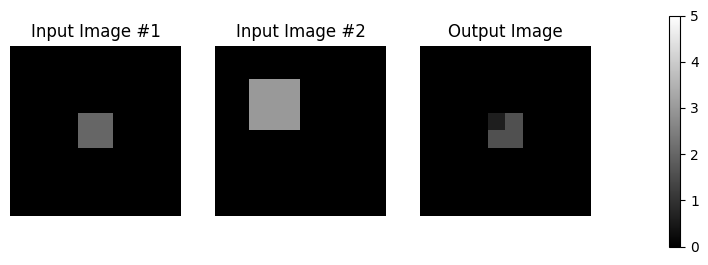

In [11]:
res = im.arctan2(si1, si2)  

display_images(si1, si2, res)

### Logic Operations

You can perform element-wise logical operations such as AND, OR, and NOT on `SharedImage` and `SharedImageSet` objects. 

These operations are useful for tasks such as masking, thresholding, and combining binary images.

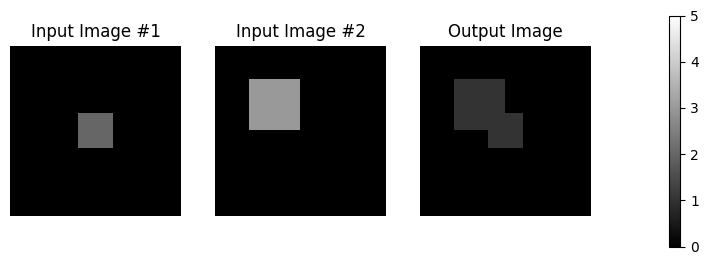

In [12]:
# use the module method from imagemath 
res = im.not_equal(si1, si2)

# or use != operator, i.e. the dunder method SharedImage.__ne__() 
res = (si1 != si2)

display_images(si1, si2, res)

### Linear algebra 

Find the channel-wise norm of a `SharedImage` instance. 

In [13]:
res = im.norm(si1, order=2)  # module method from imagemath 
res = si1.norm(order=2)      # class method of SharedImage

print(res)
print(type(res))

[4.]
<class 'numpy.ndarray'>


## Lazy Evaluation

Lazy evaluation is implemented with the `Expression` wrapper class. Expressions can contain `SharedImage`, `SharedImageSet`, or scalar values (float). All the methods that you see under the `imagemath` module are also defined for the `imagemath.lazy` submodule. 

Create expressions with `SharedImage` instances: 

In [14]:
expr1 = Expression(si1)
expr2 = Expression(si2)

print(type(expr1))
print(type(expr2))

<class 'imfusion._bindings.imagemath.lazy.Expression'>
<class 'imfusion._bindings.imagemath.lazy.Expression'>


As an example, add `expr1` and `expr2` again. Alternatively, you can add `expr1` and `si2` or `si1` and `expr2`. Any expression containing an instance of `Expression` will be converted to lazy evaluation expression automatically. 

**Warning:** You cannot use the module methods of the `imagemath.lazy` module if none of the input arguments are wrapped by `Expression`. 
 

In [15]:
# use module methods from the imagemath.lazy submodule 
res_expr = lazy.add(expr1, expr2)  
print(type(res_expr))

# Warning: The following overloaded method is not implemented!
res_expr = lazy.add(si1, si2)  
print(type(res_expr))

# or use + operator, i.e.  i.e. the dunder method Expression.__add__()
res_expr = expr1 + expr2 
print(type(res_expr))

# or use the dunder method of SharedImage, i.e. SharedImage.__add__()
res_expr = si1 + expr2  
print(type(res_expr))

<class 'imfusion._bindings.imagemath.lazy.Expression'>
<class 'NotImplementedType'>
<class 'imfusion._bindings.imagemath.lazy.Expression'>
<class 'imfusion._bindings.imagemath.lazy.Expression'>


Find the result with lazy evaluation:

<class 'imfusion._bindings.SharedImage'>


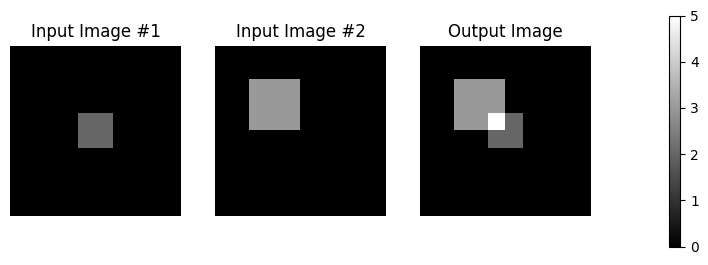

In [16]:
# Call Expression.evaluate() method
res = res_expr.evaluate()
print(type(res))

display_images(si1, si2, res)

The advantage of using lazy evaluation approach is the improved time-efficieny and optimized memory usage. Here is an example to see the difference between eager and lazy evaluation in terms of computational time. 

In [17]:
import time

tic = time.time()
img = si1 
for i in range(100): 
    img = img + si2 * si2

print("--- %f seconds ---" % (time.time() - tic))


# Expression tree is built up here. 
# At the end, evaluate your last expression. 
tic = time.time()
expr = Expression(si1)
for i in range(100): 
    expr = expr + Expression(si2) * Expression(si2)
res = expr.evaluate()

print("--- %f seconds ---" % (time.time() - tic))

--- 0.092005 seconds ---
--- 0.235322 seconds ---
